# Python variables - behind the scenes

We will now examine how Python stores objects in memory, and the link between variables and memory location. You might be wondering why you need to worry about this, but it is actually essential to understand this in order to make best use of Python's capabilities and avoid mistakes/bugs.

## Assignment and modification

Consider the following two examples. First:

In [1]:
a = 2
b = a
print(a, b)

2 2


In [2]:
a = 4
print(a, b)

4 2


This should hopefully make sense so far.

Now consider the following example:   

In [3]:
a = [2, 3, 4]
b = a
a.append(5)
print(a, b)

[2, 3, 4, 5] [2, 3, 4, 5]


In this case, modifying ``a`` modified ``b`` too! This is not as intutitive... But if we do:

In [4]:
a = 9
print(a, b)

9 [2, 3, 4, 5]


This time, changing ``a`` did not change ``b`` - what is happening?

The key is to understand that doing:
    
    variable = something
    
will change which object ``variable`` is pointing to in memory (**assignment**). On the other hand, when calling a method with:

    variable.method()

some (but not all) methods will modify the variable **in-place** (more information below).

Let's go over the examples above but this time with a graphical representation, where the yellow circles show the **variables**, and the blue rectangles show the **objects in memory**. If we do:

In [ ]:
a = 2
b = a
a = 4

then what is happening is the following.

First, when doing ``a = 2`` we create space in memory for the value ``2`` and we assign that location in memory to the variable ``a``:

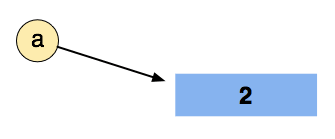

By doing ``b = a``, we are now assigning the variable ``b`` to point at the same object as ``a``:

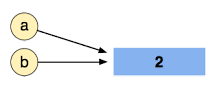

And finally by doing ``a = 4`` we re-assign ``a`` to point at a different place in memory (containing ``4``) but ``b`` still points at the same object (``2``):

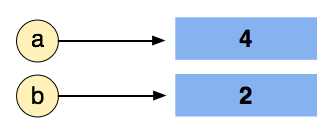

Now if we follow the same logic for the second example:

In [ ]:
a = [2, 3, 4]
b = a
a.append(5)

we again start off by creating space in memory for the list ``[2, 3, 4]``, then we point the variable ``a`` to that location.

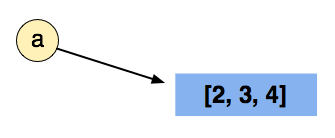

By doing ``b = a``, we then point ``b`` to the same location as ``a``, so **the list exists only once in memory** (this is very important):

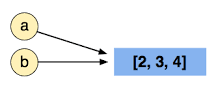

We now **modify, in-place,** the object that ``a`` is pointing to with ``a.append(5)`` - the concept of modifying the object is very important - we are not creating a new list, it is still in the same place in memory, even if it has one extra element now:

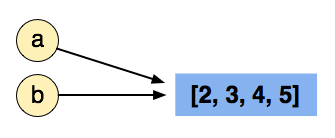

This means that since ``b`` is pointing to the same place in memory, it will also see a list with (now) four elements!

Then, if one does ``a = 9``, then one is not modifying the list, but instead assigning ``a`` to point to a region in memory with the value ``9``:

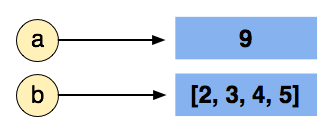

In order to talk about this behavior, we use the terms **copying** and **referencing**. When we do:

    variable = something

then the **value** is actually created when writing ``something``. The assignment merely creates a pointer (“reference” is just a fancy name for that) from a name to that value, and you could have more such names pointing to the same something.

Another important point is that what is on the right hand side will get evaluated first, and will (conceptually) result in the creation of a new object unless the ``something`` is a reference already (in which case ``variable`` and ``something`` will just refer to the same value.  In the following cases, ``something`` is a “literal” (i.e., the representation of a value in the source code), and a new value will be created:

In [5]:
a = 2
b = a + 1
c = b * 2
print(a, b, c)

2 3 6


In the second assignment in the following, ``something`` is a reference, and hence no new object is being created:

In [6]:
a = [2,3,4]
b = a  # b points to the same object than a

In case you're uncertain at some point, there's python's built-in ``id`` function that tells you the identity (in memory) of its argument:

In [7]:
id(a), id(b), id(c)

(140547734150272, 140547734150272, 140547436112336)

In [9]:
a = [1,2,3]
b = a
print(id(a), id(b))
a.append(4)
print(a,b)
id(a), id(b)

140547734155328 140547734155328
[1, 2, 3, 4] [1, 2, 3, 4]


(140547734155328, 140547734155328)

## Copying

In some cases, the behavior described above is not desirable, and we want to make a true copy, not just a reference, *because we want to change* ``b`` *without changing* ``a``:

In [10]:
from copy import deepcopy
a = [2,3,4]
b = deepcopy(a)
print(id(a), id(b))
a.append(5)
print(a, b)

140547734148608 140547734158464
[2, 3, 4, 5] [2, 3, 4]


The ``copy`` module contains a function ``copy``, too.  If you want to really understand what's going on, it will probably help to create a nested list (as in ``[[1,2,3], ['a', 'b', 'c']]``), copy that and manipulate the inner lists.

Note that slicing (usually) creates a copy, too (careful with numpy arrays, though), which is why in quite a bit of source code you see slices when a copy is desired:

In [11]:
a = [1,2,3]
b = a[:]
print(a, b)
print(id(a), id(b))

[1, 2, 3] [1, 2, 3]
140547734149760 140547734148992


## Methods

As mentioned above, some *methods* modify object **in-place**:

In [12]:
a = [1,2,3]
a.append(5)  # modifies ``a``

and some will return a copy rather than modifying the object.

In [13]:
s = 'hello'
print(s.upper())  # returns a copy of the string in uppercase without modifying s
print(s)

HELLO
hello


It should be clear from the documentation (e.g. ``s.upper?``) how a particular method behaves.

In [14]:
s.upper?

## Mutable vs immutable objects

Some objects are **immutable**, which means that they cannot be modified - examples include ``float``, ``int``, ``str``. For instance, when doing:

In [15]:
a = 1.
a = 2. 

In the second line, a new location in memory is created for ``2.``, and ``a`` points at that object, not at ``1.`` (in other words, the float is not being changed, it is ``a`` that is pointing to a different object).

On the other hand, ``list``, ``dict``, and Numpy arrays are **mutable**, which means the object can be modified:

In [17]:
a = [1,2,3]
a.append(5)
print(a)

[1, 2, 3, 5]


After the second line, ``a`` still points at the same list, but the list has now been modified.

## Functions

A final but important point is that when passing variables to functions, variables are passed as references, so:

In [18]:
def do(x):
    x.append(1)
    print("value in the function:", x)
    
a = [1,2]
do(a)
print(a)

value in the function: [1, 2, 1]
[1, 2, 1]


The following, however, just changes the value ``x`` in ``do`` references and thus has no effect outside of ``do``:

In [19]:
def do(x):
    x = 0  # re-assigns x to 0, but only in the function
    print("value in the function:", x)

a = [1,2]
do(a)
print(a)

value in the function: 0
[1, 2]


## Copying and Referencing Numpy arrays

With Numpy arrays, one has to be particularly careful with the copying/referencing distinction. With a few exceptions (and superficially contrary to the behaviour of almost all other python objects), most slicing/masking operations in Numpy indicate **references**, not copies, to the data:

In [20]:
import numpy as np

In [21]:
x = np.arange(10)
y = x
y[3] = -111  # this also changes x
print(x)

[   0    1    2 -111    4    5    6    7    8    9]


This is similar to lists, but now consider the following:

In [22]:
x = np.arange(10)
print('x = ', x)
y = x[::2]
print('y = ', y)
y[3] = -111
print('after assignment x = ', x)
print('after assignment y = ', y)
print(id(x),id(y))      # Note that this happens even though 
                        # the id of a view pointing to a subset of the orignial array 
                        # is different from the original array

x =  [0 1 2 3 4 5 6 7 8 9]
y =  [0 2 4 6 8]
after assignment x =  [   0    1    2    3    4    5 -111    7    8    9]
after assignment y =  [   0    2    4 -111    8]
140547167789776 140547305238672


Even though we took a slice with a given start, end, and slice, the resulting array was still just a reference, or **view**, of the array in the original array! (note that for lists, ``x[::2]`` returns a copy!). 

We have actually used this convenient feature when masking:

In [23]:
x[x < 5] = 0.
print('after masking x = ', x)
print('after masking y = ', y)

after masking x =  [0 0 0 0 0 5 0 7 8 9]
after masking y =  [0 0 0 0 8]


There is one exception to the referencing, which is:

In [24]:
x = np.arange(10)
y = x[[1,3,2,2,7]]  # fancy indexing returns a new array, not a view
y[0] = -111
print('x = ', x)  # x has not been changed
print('y = ', y)

x =  [0 1 2 3 4 5 6 7 8 9]
y =  [-111    3    2    2    7]


As before, you can explore this further to understand in what cases references or copies are made. However, be aware that the ``id`` of a view *will* be different from the original array, even though the view is actually pointing to a subset of the original array.

In the case of Numpy arrays, one can force a copy by doing:

In [25]:
x = np.arange(10)
y = x.copy()
y[0] = -111
print('x = ', x)
print('y = ', y)

x =  [0 1 2 3 4 5 6 7 8 9]
y =  [-111    1    2    3    4    5    6    7    8    9]


Before you start cursing the numpy authors because it might seem they were out to confuse you: They did this because very common operations become very fast in this way, and in practice that's much less of a trap than you may suspect.

## Exercise

The following questions are just to test your understanding of the variable assignment - you don't need to write any code - just try and think of what the output will be, then you can try it out to check if you got it right:


**Guess first before you try it out!**

What will ``a`` be after the following?

    a = [1, 3., [1, 2, 3], 'hello']
    b = a[0]
    b = 4.

What will ``c`` be after the following?

    c = [1, 3., [1, 2, 3], 'hello']
    d = c[2]
    d.append(8)

What will ``e`` be after the following?

    e = [1, 3., [1, 2, 3], 'hello']
    f = e[2]
    f = [1, 2]

What will ``g`` be after the following?

    g = [1, 2, 3, 4]
    h = g[::2]
    h[0] = 9

What will ``i`` be after the following?

    import numpy as np
    i = np.array([1, 2, 3, 4])
    j = i[::2]
    j[0] = 9

In [ ]:

# You can try here to see if your guess is correct!


## More on indexing in Numpy and views (optional)

In [ ]:
a = np.arange(20)+1
print(a)

The above creates a one-dimensional array with elements 1 ... 20. The computer memory stores data also in a 1D arrangement, each storage "box" containing data has a *memory address*.

With Numpy's ``reshape`` function we can make 2D array from the array *a*.

In [ ]:
d1 = 5 # invent some sizes of the two dimensions so that d1*d2 = len(a)
d2 = 4
b = np.reshape(a, (d1,d2))  # makes 5x4 matrix from a
print(b)

b[2,2] = -111
print(b, a)

One has to realize that there is at least one further possibility how to arrange the array ``a`` into a 2D matrix:

In [ ]:
c = np.reshape(a, (d1,d2), order='F')  # also makes 5x4 matrix from a
print(c)

The first way is called **row-major** ordering, the second **column-major** ordering. Programming languages like Fortran, Matlab, and R use column-major ordering (as in array ``c``). The language C is using row-major ordering (as in array ``b``).  Python is applying row-major ordering by default but can also do column-major ordering if requested.

We can try to emulate the behavior that we have seen by explicitly construct the mapping between multi-dimensional index tupel and sequential memory address (German "Speicherabbildungsfunktion"). Here for the row-major ordered array ``b``:

In [ ]:
# mapping function (i,j) -> memory address
def xrow(i,j):
    return d2*i+j   # note dependence on dimension d2 only

for i in range(d1):
    for j in range(d2):
        print(f"({i:},{j})  {b[i,j]:4d} {a[xrow(i,j)]:4d}" )    #{x:4d} converts x to a 4-character string

We see that the multi-dimensional arrays are a software concept, giving the user the feeling of working with multi-dimensional arrays while the internal lay-out of the data is actually sequential. A Numpy **view** is just this kind of mapping, i.e. in fact an internal function converting index tupels to sequential address.

In the lecture is was stated that an index slice is in fact a view. Here is an example of how a slice like ``b[::2,1:3]`` can be expressed by a function picking out the expected elements from array ``a``:

In [ ]:
d = b[::2,1:3]

shape_d = np.shape(d)

def xslice(i,j):
    return d2*i*2 + j+1    # factor 2 for step, and offset 1 

for i in range(shape_d[0]):
    for j in range(shape_d[1]):
        print(f"({i:},{j})  {d[i,j]:4d} {a[xslice(i,j)]:4d}" )  